# Project 3: Multiple Hypothesis Testing and CRISPR


   <div class="alert alert-block alert-danger">
    <center>Due: <b>Monday 21 March, 8:59pm</b>.</center> 
   </div>
   
   <div class="alert alert-block alert-warning">
   <center>
       <b>Collaboration and Resource Policy</b>
    </center>
    For this assignment, you are encouraged to work with one other person. 
    
We expect most students will have the best learning experience on this assignment by working with a partner, but if you prefer to work alone it is okay to do this assignment on your own. Your partner can be anyone you mutually choose, so long as you are able to work together well.
    
You are permitted (actually <i>encouraged</i>) to discuss these problems with anyone you want, including other students in the class. If you do discuss the specific questions in the assignment with anyone other than your assignment partner and the course staff, though, you should list them in the _External resources used_ section below.
    
You are welcome to use any resources you want for this assignment, other than ones that would defeat the purpose of the assignment. This means you should not look at answers or code from any other students in the class (other than your collaboration with your partner), and if you find code that implements the exact problem you are being asked to do for the assignment, you should not use that code. Since parts of this assignment are adapted from an NCSU assignment, you should also not search for or use any answers you might find for that specific assignment. You should document all external resources you use that are not part of the course materials in the _External resources used_ section below.
    </div>

**Team submitting this assignment:**  
<div class="alert alert-success">
    Anna Williamson (amw4uet)
</div>

**External resources used:** 
<div class="alert alert-success">
<em>It is not necessary to list the course materials, but if you used any other resources, including discussing problems with students not on your team, list them here.</em>
- https://www.addgene.org/guides/crispr/

- http://crispor.tefor.net/crispor.py?batchId=ELBFf4bV3hYjqbHIRt5C
- https://practical-haemostasis.com/Genetics/genetics_mutational_analysis.html
- http://crispor.tefor.net/manual/
- https://horizondiscovery.com/en/applications/gene-editing/crispr-guide-rna-specificity
- https://www.youtube.com/watch?v=dXPDefej0Ps
- https://www.youtube.com/watch?v=EVNABwOCt_s
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6164648/#:~:text=A%20natural%20graphical%20method%20for%20visualizing%20the%20body%20of%20these,to%20a%20flat%2Dlooking%20histogram
- https://www.scribbr.com/statistics/type-i-and-type-ii-errors/#:~:text=A%20Type%20I%20error%20means,alpha%20or%20%CE%B1
</div>

 <div class="alert alert-block alert-warning">
    
<b>Submission</b>: You should work on this assignment by following the directions provided at https://computingbiology.github.io/project3. Add the other teammate to as a collaborator with write access (also under the Settings tab) to this repository.
    
You should answer the questions and write your code in this Jupyter Notebook. (It is find if you prefer to organize your work some other way, but if you do, make sure your answers are clear and complete in the document you submit.) Parts where you are expected to provide an answer (which could be text that can be written in markdown format in the notebook or Python code that runs in the notebook) are marked in green.
        
When you are ready to submit the assignment, you should **print your notebook as a PDF file** (unlike previous projects, you do not need to submit your repository or source notebook). You should check that the printed PDF does contain all your answers and that they are readable in it. Then, send a message in slack to a channel that includes both team members (so the one sending this message should include the other team member) and all of the course staff (`dave`, `Hyun Jae Cho`, and `Anshuman Suri`) and attach the printed PDF to that message.
    </div>

## Getting Started

For the second part of the project, you will need to install [SnapGene](https://www.snapgene.com/snapgene-viewer/). You do need to provide an email address to obtain a registration code to be able to use a free trial version, which will work for a month, which is more than sufficient for the current project. (Note that it is not necessary to provide a real email address for this, you can get the registration code from the web form and do not need to receive an email from them.)

Their website has OS-specific instructions for installing the software.

In [ ]:
import numpy as np
from scipy import stats
import utils
import matplotlib.pyplot as plt

# Part 1: Multiple Hypotheses Testing

These questions are about understanding how we learn correlations between genotypes and phonotypes, as discussed in [Class 10](https://computingbiology.github.io/class10/).

<div class="alert alert-success">

**Problem 1 (a). Family-Wise Error Rate (FWER).** We are interested in finding out if a set of genes in the genome are differentially expressed between two populations with significance level of $\alpha$ = 0.05. We are running $N=10000$ hypotheses simultaneously, one for each gene of interest. What is the probability that by chance (when none of the genes are actually correlated with the phenotype) that at least one of the hypotheses rejects the null hypothesis of no differential expression? 

</div>


By using the given equation (1 - (1 - α)^m) where α = 0.05 and m = 10000, we can see that the probability that at least one of the tests rejects the null hypothesis (where the null hypothesis is that none of the genes are correlated with the phenotype) is approximately 1.0. This suggests that at least one of the tested genes impacts the expressed phenotype.

<div class="alert alert-success">
    
**Bonferroni correction.**
    
**Problem 1 (b).** The more hypothesis tests are made simultaneously, the more likely at least one will be erroneously considered. This is commonly referred to as the multiple comparisons (hypotheses testing) problem. As discussed in class, a simple method to mitigate the problem is the Bonferroni correction. By running the Bonferroni correction, at what p-value cutoff would a null hypothesis be rejected when there are $N = 10,000$ hypotheses? 
    
**Problem 1 (c).** Based on the $p$-value cutoff you determine for (b), what is the probability that by chance at least one of the hypotheses rejects the null hypothesis of no differential expression?

</div>


By applying the Bonferroni correction to the hypothesis testing and using the formula p = α/m, then we get a new p-value cutoff of 5.0 x 10^-6. Then we can apply the same formula (1 - (1 - α)^m) with this new p-value as α to show that there is a 0.0488 probability that at least one of the tests rejects the null hypothesis. 

**False Discovery Rate (FDR)** The Bonferroni correction assumes that all the hypotheses are independent of each other. However, we know that gene expressions are not always independent. With a large number of positively correlated hypotheses, the Bonferroni correction can be too conservative, leading to a high rate of false negatives, as you may have noticed when calculating the $p$-value cutoff above. This is especially true in the case of genomics, as preventing any single false positive may be too strict for genomewide studies.

    
One approach to conceptualize the rate of false discovery rate in multiple hypotheses testing is the False Discovery Rate (FDR), which is a more widely used metric of hypothesis testing in genomics. Briefly refer to the Definitions section in <a href="https://en.wikipedia.org/wiki/False_discovery_rate#:~:text=are%20independent.%5B10%5D-,Definitions,-%5Bedit%5D">False Discovery Rate</a> to learn about the possible outcomes when testing multiple null hypotheses. The FDR value is calculated by $\frac{V}{V+S}$, where V is the number of false positives (type I error) and S is the number of true positives.

During our experiment, we find that only some of the genes are differentially expressed between the two populations. The measurements for the differential expressiveness of these genes will come from two different distributions (indicating the difference in the expressiveness for each population) and those of the non-differentially expressed genes will come from one (indicating no difference between the populations). 

Below, we have provided code for creating and sampling from three different normal distributions.

In [ ]:
def create_normal(mean, std, size):
    return np.random.normal(mean, std, size)

s1 = np.random.normal(0.0, 1.0, 10000) # distribution for the non-differentially expressed genes
s2 = np.random.normal(1.0, 1.0, 10000) # distribution 1 for the differentially expressed genes
s3 = np.random.normal(2.0, 1.0, 10000) # distribution 2 for the differentially expressed genes

In [ ]:
def pvals_from_dists(dist1, dist2, num_samples, num_iters):
    p_vals = []
    for i in range(num_iters):
        samples1 = np.random.choice(dist1, size=num_samples, replace=False)
        samples2 = np.random.choice(dist2, size=num_samples, replace=False)
        _, p = stats.ttest_ind(samples1, samples2)
        p_vals.append(p)
    return p_vals
p_vals1 = pvals_from_dists(s1, s1, 10, 1000) # p-values from samples from s1
p_vals2 = pvals_from_dists(s2, s3, 10, 1000) # p-values from samples from s2 and s3

In [ ]:
len(p_vals1), len(p_vals2)

(1000, 1000)

<div class="alert alert-success">

**Problem 2 (a).** How many $p$-values are below 0.05 from `p_vals1` and `p_vals2`?
</div>


In [ ]:
belowp1 = 0
for each1 in p_vals1:
  if (each1 < 0.05):
    belowp1 += 1

belowp2 = 0
for each2 in p_vals2:
  if (each2 < 0.05):
    belowp2 += 1

print("p-values below 0.05 from p_vals1: ", belowp1)
print("p-values below 0.05 from p_vals2: ", belowp2)

p-values below 0.05 from p_vals1:  45
p-values below 0.05 from p_vals2:  566


There are 51 p-values below 0.05 from p_vals1.

There are 529 p-values below 0.05 from p_vals2.

The provided code below plots histographs for the different distributions and $p$-values.

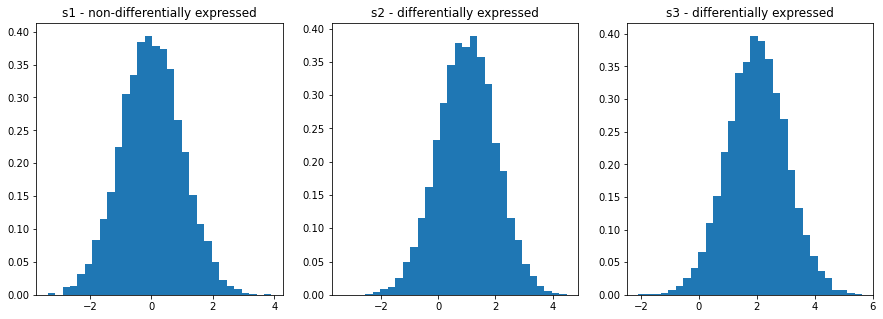

In [ ]:
num_bins = 30

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.hist(s1, num_bins, density=True)
ax1.set_title('s1 - non-differentially expressed')
ax2.hist(s2, num_bins, density=True)
ax2.set_title("s2 - differentially expressed")
ax3.hist(s3, num_bins, density=True)
ax3.set_title("s3 - differentially expressed")
plt.show()

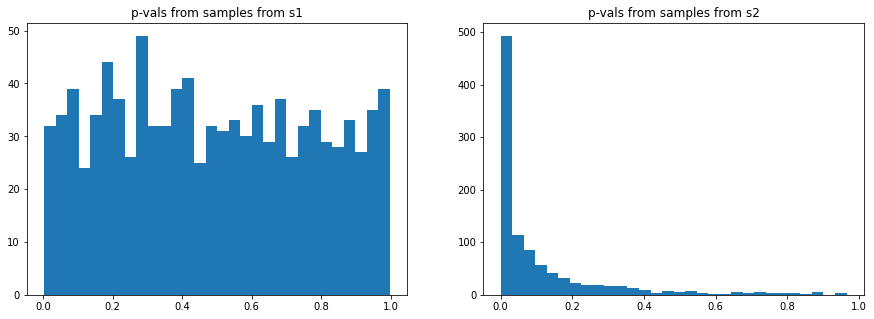

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
pvals_counts1, bins1, _ = ax1.hist(p_vals1, num_bins)
ax1.set_title('p-vals from samples from s1')
pvals_counts2, bins2, _ = ax2.hist(p_vals2, num_bins)
ax2.set_title("p-vals from samples from s2")
plt.show()

<div class="alert alert-success">

**Problem 2 (b).** Explain why the histogram on the right is significantly skewed to the left.
</div>

The x-axis of these histograms are the p-values from s1 or s2 while the y-axes are the frequency. The more "flat" or "uniform" a histogram of p-values looks, the more likely that all the null hypotheses are true. In contrast, a more skewed histogram suggests that some of the null hypotheses are false. In the graph on the left, there is an overabundance of low p-values where the p-value is the likelihood that the results are non-significant or occured due to chance. The fact that there are lots of low p-values for the graph on the left means that it is NOT likely that the results are due to chance and this suggests that we can reject multiple null hypotheses since our results were significant in many cases. This analysis makes sense in this situation since s1 includes p-values created from the calculated distance between values in the same sample (i.e. a roughly equal number of distances and therefore p-values due to the randomly sampled values from s1) while s2 includes p-values created from the calculated distance between values in s2 and s3 (where s2 and s3 have different distributions of values). It makes sense that the p-values of s1 should reflect a non-significant difference bewtween s1 and s1 (and therefore a "flat" histogram) while the p-values of s2 and s3 reflect a significant difference between s2 and s3 (and therefore a histogram skewed left).

References: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6164648/#:~:text=A%20natural%20graphical%20method%20for%20visualizing%20the%20body%20of%20these,to%20a%20flat%2Dlooking%20histogram 

<div class="alert alert-success">
    
**Problem 2 (c).** The histogram (plotted below) of all of the genes is the sum of the hisgrams of the differentially expressed genes and the non-differentially expressed genes. Calculate the FDR value with $\alpha=0.05$. 
</div>

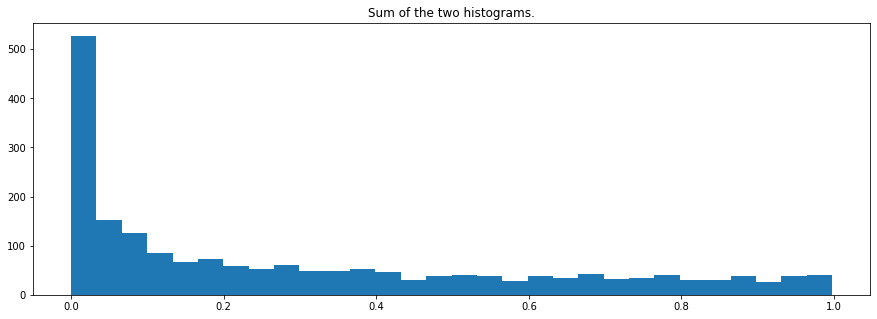

In [ ]:
fig, ax1 = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(15)

pvals_counts, bins, _  = plt.hist((p_vals1+p_vals2), num_bins)
plt.title("Sum of the two histograms.")
plt.show()

In [ ]:
'''
FDR = V / (V + S)
...where V is the probability of a type I error and S is the number of true positives

Hmmm, can I just add these values? It seems that the data was simply added together in the histogram...

References: https://www.scribbr.com/statistics/type-i-and-type-ii-errors/#:~:text=A%20Type%20I%20error%20means,alpha%20or%20%CE%B1)%20you%20choose.
'''

# V is the number of values such that the null hypothesis is true (data point is in s1) and the test is declared significant (p-value is less than 0.05)
V = belowp1

# S is the number of values such that the alternate hypothesis is true (data point is in s2) and the test is declared significant (p-value is less than 0.05)
S = belowp2

FDR = V / (V + S)
print("FDR: ", FDR)

FDR:  0.08793103448275862


The FDR (false discovery rate) at α = 0.05 is 0.0879.

# Part 2: Gene Editing with CRISPR

This part of the assignment is heavily based on [https://qubeshub.org/community/groups/coursesource/publications?id=2701&v=1](https://qubeshub.org/community/groups/coursesource/publications?id=2701&v=1), and has been adapted to fit into our Notebook format of Projects. That assignment was developed by Leigh Ann Samsa, Linnea Andersen, Adam Groth, and Carlos Goller at North Carolina State University, and genorously shared under an open license which enables this adaptation. 

For this part, you will first implement your own algorithm that can infers Cas-specific spacer sequence length and Cas-specific PAM sequence, and finds potential target sites by comparing 20 nt sequences upstream of NGG PAMs to the rest of the genome. Unlike previous assignments in this class, you will be primarily using available tools (including the SnapGene tool you downloaded) and the [CRISPOR](http://crispor.tefor.net/) web-based tool) rather than implementing your own algorithms.

[CRISPOR](http://crispor.tefor.net/) is a tool for designing a guideRNA (gRNA) for CRISPR. The source code for CRISPOR is available at https://github.com/maximilianh/crisporWebsite (but you are only expected to use the web interface for this assignment).

<b>Approach:</b>  One of the applications of tools like CRISPOR is to use a gRNA to guide a Cas9 to a target site and provide a piece of donor DNA for Homology Directed Repair (HDR). The donor DNA is almost identical to the genomic sequence surrounding the target site with two exceptions (1) a silent mutation is introduced into the PAM so that the encoded amino acid coded is the same but the DNA it is not cleaved and (2) the donor DNA contains the DNA change you want to make in the genome. Note that it is not always possible to generate a silent mutation in the PAM sequence. Though HDR is not as efficient as Non-Homologous End Joining (NHEJ), with this approach you can make precise edits to the genome. Notably, this approach is not restricted to small changes - modifications of this approach can be used to knock in thousands of bases.

PAM - protospacer adjacent motif; "a short DNA sequence that follows the DNA region targeted for cleavage by the CRISPR system"; it follows the protospacer sequence (i.e. the sequence in viral DNA invading the bacteria) so that the bacteria is able to identify this DNA as "other" without destroying the saved viral DNA in its own CRISPR array

References: https://www.synthego.com/guide/how-to-use-crispr/pam-sequence

<b>Scenario</b>: Progeria (also known as Hutchinson-Gilford syndrome) is a rare (about 1 in 4,000,000) genetic disease of childhood characterized by dramatic, premature aging. As newborns, children with progeria usually appear normal. However, within a year, their growth rate slows, and they soon are much shorter and weigh much less than others their age. While possessing normal intelligence, affected children develop a distinctive appearance characterized by baldness, aged-looking skin, a pinched nose, and a small face and jaw relative to head size. They also often suffer from symptoms typically seen in much older people. Death occurs on average at age 13, usually from heart attack or stroke. ([NIH Genetic and Rare Disease Information Center](https://rarediseases.info.nih.gov/diseases/7467/disease) has more information on the disease.)

<b>Experimental design</b>: Progeria is caused by a single point mutation in the lamin A gene (LMNA). This single-base substitution, G608G (GGC > GGT) within exon 11 is responsible for this autosomal dominant disease by activating a cryptic splice site, resulting in production of a protein product that deletes 50 amino acids near the carboxy terminus. (Source: [Eriksson et al. DOI: 10.1038/nature01629](https://www.nature.com/articles/nature01629)). 

First, you will understand how this single base substitution is sufficient to cause cellular indications of the disease. To do this, you have a human fibroblast cell line with the “wild type” GGC genotype in exon 11. You want to use HDR to replace the C with a T, and then compare the phenotype of the two genotypes on otherwise identical genetic backgrounds. Design a gRNA to use in combination with the SpCas9 of the G608 in exon 11 of human LMNA.

## Analyzing the Gene

### Locating the Gene

1. Access the NCBI website ([http://www.ncbi.nlm.nih.gov](https://www.ncbi.nlm.nih.gov/)) and select “gene” from the drop-down menu that currently displays “All databases”.
2. Type the gene name (`LMNA`) into the search bar, and click on the gene corresponding to the correct species. This will take you to a webpage laying out known information about the gene. Halfway down the page is a viewer looking at the gene. We are going to use SnapGene to recreate and annotate parts of this viewer.

In the “Genomic Context” heading, you should find the accession number and location range for the gene. Accession numbers are just unique, standardized identifiers for identifying information in the NCBI database. The `NC_` prefix means it is a reference assembly for a complete genomic molecule (see [GenBank Accessions](https://community.gep.wustl.edu/repository/course_materials_WU/annotation/Genbank_Accessions.pdf) for details on what the different prefixes mean). You should see the accession number `NC_000001.11` for the gene you located by following the two steps above, which identifies the first chromosome for homo sapiens (from a patched version of the GRCh38 human genome assembly). You can also find the locations where the LMNA gene occurs, which will be useful for finding it in SnapGene.
 

https://www.ncbi.nlm.nih.gov/gene/4000

### Identifying relevant regions

1. Open SnapGene.
2. File -> Import -> NCBI Sequence
3. Enter your gene accession number and click Import. Note that this step can take quite a while- the final file is ~1GB, and the in-built downloader is not particularly fast. It took around 5-6 minutes on our machines (and SnapGene appears to hang while it is downloading - just be patient...)
4. Save the file.

<div class="alert alert-warning">
    <b>Hint:</b> You can view specific Features by clicking on the 'Features' tab at the bottom of SnapGene. Remember that we want to focus on Exon 11 of LMNA Isoform A. As a sanity check, you can confirm that G608 indeed has gcc. Your 'Sequence' (after you find the correct Exon) should look something like this (assuming you chose to color the selected feature as red):
</div>

The location of exon 11 depends partly on the transcript you are using in NCBI since there is some variation between them. I ended up arbitrarily deciding on transcript NM_170707.4 which stated that exon 11 existed between locations 156,138,488 and 156,138,757. For comparison, transcript NM_005572.4 did not even include an 11th exon... the other transcripts, however, had similar ranges for exon 11. 

References: https://www.youtube.com/watch?v=EVNABwOCt_s

![image.png](attachment:image.png)

Now that we have found the desired mutation, we need to pick a target sequence to use for designing our gRNA. It should not be too short (e.g. not just GCC, since that could easily be repeated elsewhere) and not too long.

<div class="alert alert-success">

**Problem 3.** In SnapGene’s sequence view (select using the View menu) find the exon containing LMNA (if you select Zoom Controls in the View menu, you will be able to enter the location of the LMNA gene there). Copy the sequence (top strand of bases) of the exon you have chosen to target and paste it below.

</div>

Remember that we are looking for a place to be cut with SpCas9, which has a PAM of "NGG." Use the CRISPOR web application and submit exon 11 that needs to be edited.

<div class="alert alert-warning">
    <b>Hint:</b> You can help the given function to make sure that you pick the right sequence. It should be 102bp long. Example usage is given below. Note that the output of this function being 'True' does not necessarily mean that you have picked the right sequence, but it is intented to be a helpful check so you know you are on the right track.</div>

In [ ]:
# Example - this is not the actual sequence
#utils.check_if_desired_seq("cgcgtgcgggacctgcgggcagcctgccgacaaggcatctgcc")
utils.check_if_desired_seq("cgcaccgtgctgtgcgggacctgcgggcagcctgccgacaaggcatctgccagcggctcaggagcccaggtgggcggacccatctcctctggctcttctgcc")

True

sequence: cgcaccgtgctgtgcgggacctgcgggcagcctgccgacaaggcatctgccagcggctcaggagcccaggtgggcggacccatctcctctggctcttctgcc

References: https://www.youtube.com/watch?v=dXPDefej0Ps 

## Using CRISPOR to design gRNA

1. Open [CRISPOR](http://crispor.tefor.net/).
1. Paste your target range into the `Step 1` box.
3. Select the appropriate genome in the `Step 2` drop down menu. If there are multiple genome assemblies that match our study, select one and include a justification for your selection.
4. Select the appropriate Cas PAM from the `Step 3` drop down menu.
5. Click submit

<div class="alert alert-success">
    
**Problem 4.** What did you use for the genome (Step 2 above) and the PAM (Step 3)?
    </div>

Genome: cgcaccgtgctgtgcgggacctgcgggcagcctgccgacaaggcatctgccagcggctcaggagcccaggtgggcggacccatctcctctggctcttctgcc

From the multiple possible genome assemblies, I selected "Homo Sapiens - Human - UCSC Dec. 2013 (GRCh38/hg38) + SNPs: dbSNP 148, Kaviar" because it is based off of the GRCh38 human genome assembly which we used as our genome for this project (retrieved from NCBI). 

I selected the "NGG" PAM with SpCas9 since this is the enzyme and associated PAM sequence that was mentioned in the project description in order to perform the desired mutation.

## Analyzing the CRISPOR Readout

<div class="alert alert-success">

**Problem 5 (a).** How long is your sequence?

</div>

The sequence is 102 bp long.

<div class="alert alert-success">

**Problem 5 (b).** How many possible guides are in your sequence?

</div>

There are 19 possible guide sequences.

<div class="alert alert-success">

**Problem 5 (c).** Are there any regions of your sequence that are particularly rich or poor in possible guide sites?

</div>

Yes - there is a region near the end of the sequence that could allow for 6 different possible guide sites (though with varying specificity). This occurs approximately between base pairs 63 and 77. There are quite a few locations along the sequence that contain no guide sites, particularly the beginning and end of the sequence as well as some locations in between possible guide site locations.

## Analyzing the gRNA

<div class="alert alert-success">

**Problem 6 (a).** What is gRNA specificity? What is the range of MIT Specificity Scores? What does a high score mean?  

</div>

gRNA specificity refers to amount of off-target effects that are expected to occur, where a more unique sequence within the genome can expect fewer of these unintended consequences while a less unique sequence within the genome can expect more unintended consequences as the likelihood of the gRNA to match with a different, unplanned location on the genome increases. The range of MIT Specificity Scores is between 0 and 100, where a high score means that fewer off-target effects can be expected. 


References: https://horizondiscovery.com/en/applications/gene-editing/crispr-guide-rna-specificity, https://genome.ucsc.edu/cgi-bin/hgTrackUi?db=criGri1&g=crispr#:~:text=The%20MIT%20Specificity%20score%20summarizes,rather%20strong%20or%20weak%20cleavage 

<div class="alert alert-success">

**Problem 6 (b).** What is gRNA efficiency? What is the range of Doench’16 Efficiency Scores? What does a high score mean?

</div>

gRNA efficiency describes how well the target sequence in the genome will be cut by the gRNA. The range of Doench'16 Efficiency Scores is between 0 and 100, where a high score indicates that 

References: http://crispor.tefor.net/manual/, 

<div class="alert alert-success">

**Problem 6 (c).** What is a gRNA outcome prediction? What is the range of outcomes (labeled as `Out-of-Frame`)? What does a high score mean?

</div>

A gRNA outcome prediction desribes the probability of introducing deletions into the genome "out-of-frame", i.e. deletions that do not occur in multiples of three and so impact the "frame" and amino-acid encoding of the genome. The range of and "Out-of-Frame" scale is beteween 0 and 100, where a high score means that there is a greater expected number of these "out-of-frame" deletions.

References: https://practical-haemostasis.com/Genetics/genetics_mutational_analysis.html, http://crispor.tefor.net/manual/ 

## Selecting a Target Site

For all of the answers below, remember that the focus of the experiment is to be able to modify the G608 nucleotide. Thus, we would want to find a target sequence such that G608 is included in it.

<div class="alert alert-warning">
    <b>Hint:</b> You should not see more than 3 high-specifity candidates that satisfy this requirement.
</div>

<div class="alert alert-success">

**Problem 7 (a).** What are off-target 0-1-2-3-4 mismatches? How are the mismatches shown in black different from the mismatches shown in gray?

</div>

Off-target 0-1-2-3-4 mismatches is a system to describe the number and relationship of mismatches and off-targets. The digit refers to the number of off-targets while the index (starting at zero) refers to the number of mismatches. The off-targets shown in gray are ones that aren't associated with any mismatches within a 12 bp range of the sequence. 

References: http://crispor.tefor.net/crispor.py?batchId=ELBFf4bV3hYjqbHIRt5C 

<div class="alert alert-success">

**Problem 7 (b).** Rank the top 3 matches according to specificity, along with their scores.

</div>

*Ranked by largest specificity score
1. GTGGGCGGACCCATCTCCTC TGG with specificity of 87 (90/fw)
2. AGGAGATGGGTCCGCCCACC TGG with specificity of 86 (66/rev)
3. GGAGATGGGTCCGCCCACCT GGG with specificity of 76 (65/rev)

*note: these gRNA sequences are only the ones that include the desired site (i.e. the GGC at Gly 608)

<div class="alert alert-success">

**Problem 7 (c).** Rank the top 3 matches according to efficiency (and specify which score you used), along with their scores.

</div>

*Ranked by largest efficiency score
1. GGAGATGGGTCCGCCCACCT GGG with efficiency of 56 (65/rev)
2. GTGGGCGGACCCATCTCCTC TGG with efficiency of 44 (90/fw)
3. AGGAGATGGGTCCGCCCACC TGG with efficiency of 34 (66/rev)


Ranked by Doench’16 Efficiency Score.


*note: these gRNA sequences are only the ones that include the desired site (i.e. the GGC at Gly 608)

<div class="alert alert-success">

**Problem 7 (d).** Rank the top 3 matches according to outcome (and specify which score you used), along with their scores.

</div>

*Ranked by smallest outcome score
1. GTGGGCGGACCCATCTCCTC TGG with outcome of 47 (90/fw)
2. AGGAGATGGGTCCGCCCACC TGG with outcome of 54 (66/rev)
3. GGAGATGGGTCCGCCCACCT GGG with outcome of 58 (65/rev)


Ranked by "Out-of-Frame" outcome score.

*note: these gRNA sequences are only the ones that include the desired site (i.e. the GGC at Gly 608)

<div class="alert alert-success">

**Problem 7 (e).** Rank the top 3 matches according to off-target effects

</div>

*Ranked by smallest off-target effects
1. GTGGGCGGACCCATCTCCTC TGG with 81 off-target effects (90/fw)
2. AGGAGATGGGTCCGCCCACC TGG with 104 off-target effects (66/rev)
3. GGAGATGGGTCCGCCCACCT GGG with 118 off-target effects (65/rev)

*note: these gRNA sequences are only the ones that include the desired site (i.e. the GGC at Gly 608)

<div class="alert alert-success">

**Problem 7 (f).** Based on these results and your findings, select the "best" guide, and explain why you choose the one you do. Mention the selected target sequence (DNA) and the spacer sequence (RNA) separately.

</div>

The "best" guide: GTGGGCGGACCCATCTCCTC TGG (90/fw)

This guide sequence covers the selected target DNA sequence as needed. Note that the spacer sequence (RNA) is the portion of the gRNA that matches with the DNA (i.e. the list of bp listed above) before the "tail" of the gRNA. I chose this spacer sequence because it had the best specificity score while also having the smallest outcome score, suggesting that there is a low likelihood of having any off-target effects. It also does well in terms of efficiency and so scores well in all three categories. Simply based on these reasons, this gRNA spacer sequence seemed like an appropriate choice.

References: https://www.addgene.org/guides/crispr/ 


## Anticipated Off-Target Effects

1. Locate your selected guide in CRISPOR
2. For each of the 1, 2, and 3 mismatch targets, record the genomic location of the anticipated off-target cut. (If your guide only has 4-mismatch targets, do this for one of them).

The selected guide has off-target 0-0-0-8-73 mismatches:

- 0 locations with 0 mismatches
- 0 locations with 1 mismatch
- 0 locations with 2 mismatches
- 8 locations with 3 mismatches

  located: 
           chromosome, location, locus
           chr1, 28171935 to 28171957, intron: PTAFR
           chr17, 31390309 to 31390331, intergenic: NF1-RAB11FIP4
           chr8, 133529146 to 133529168, intron: ST3GAL1
           chr8, 5129800 to 5129822, intergenic: SNORA70-RN7SL318P
           chr15, 58453113 to 58453135, intergenic: RP11-355N15.1-RP11-355N15.3
           chr17, 65125549 to 65125571, intergenic: RP11-160O5.1-RGS9
           chrX, 77527884 to 77527906, intron: ATRX
           chr2, 205752399 to 205752421, intron: NRP2

- 73 locations with 4 mismatches

  located: 
           chromosome, location, locus
           chr17, 58352288 to 58352310, exon: BZRAP1-AS1/SUPT4H1/RNF43

*these locations were found by downloading the Excel table "Off-targets" from the CRISPOR website for the target sequence

<div class="alert alert-success">

**Problem 8** Go to the NCBI genome browser for your organism, enter the genome location, and describe its location. Is it in an intergenic region, promoter, intron, an exon etc...? Repeat this for 1 mismatch per n-target mismatches. 
    
<b>Optional Bonus Question:</b> Do you see any interesting studies related to these targets? Can you understand anything useful from them?

</div>

By using the data included within the downloaded "Off-targets" Excel spreadsheet, I used NCBI to confirm that at position 28171935 to 28171957 on chromosome 1, there is the PTAFR gene (an intron, i.e. coding portion of the genome) where:

actual sequence: GTGGGCGGACCCATCTCCTC 

mismatched sequence on chr1: G**A**GGG**A**GGA**A**CCATCTCCTC


I then used NCBI to confirm that at position 58352288 to 58352310 on chromosome 17, there is an exon (i.e. a non-coding portion of the genome), specifically exon 5 which ranges from 58351999 to 58353727 (note: in transcript NR_038410.1) where:

actual sequence: GTGGGCGGACCCATCTCCTC 

mismatched sequence on chr17: G**T**GGG**C**G**G**A**C**CCATCTCCTC

_Type your answer here_

## Annotate the gRNAs on your SnapGene file

First, let's download the annotated features:

1. Click “Download for SnapGene” in the sequence box. 
2. Open the downloaded file in SnapGene and transfer the annotated features to your gene file. The file contains your target range with all the possible spacer sequences as annotated features. Each feature is already marked on the correct strand and includes information about the specificity and index scores. It does <b>NOT</b> label the PAM sequence.
3. In your saved gene file (from step 2) click Feature -> Import feature -> Import feature from a SnapGene File then select the open file from the dropdown menu.
4. SnapGene - Click OK then “Add Features”. This may take a while.

Your screen should look something like this (note that this is an example- the exact target sequences may not be the same). The <i>ggc</i> in pink here is the mutation we care about.

![image.png](attachment:image.png)

Now that we have downloaded and added all features, let's identify the guide sequence we shortlisted above and find its corresponding PAM sequence:

1. Now your gene is annotated with all the possible guide sequences.
2. Annotate the “best” target sequence that you selected 
3. Locate and double click on the feature containing your selected sequence and set it color to pink (or some other color that is not already present)
4. Locate the PAM sequence associated with your selected guide. Add it as a new feature labeled “PAM” (Highlight the bases then Feature -> Add Feature).  

Here's an example of what you should be seeing when you're done with all your steps (Instead of 'Example', you will see identifiers for the target sequences).

![image.png](attachment:image.png)

<div class="alert alert-success">

**Problem 9** Add a screenshot below of the sequence that shows the exon along with the selected guide sequence and PAM annoteted. Save your file and include it in your project submission.

</div>

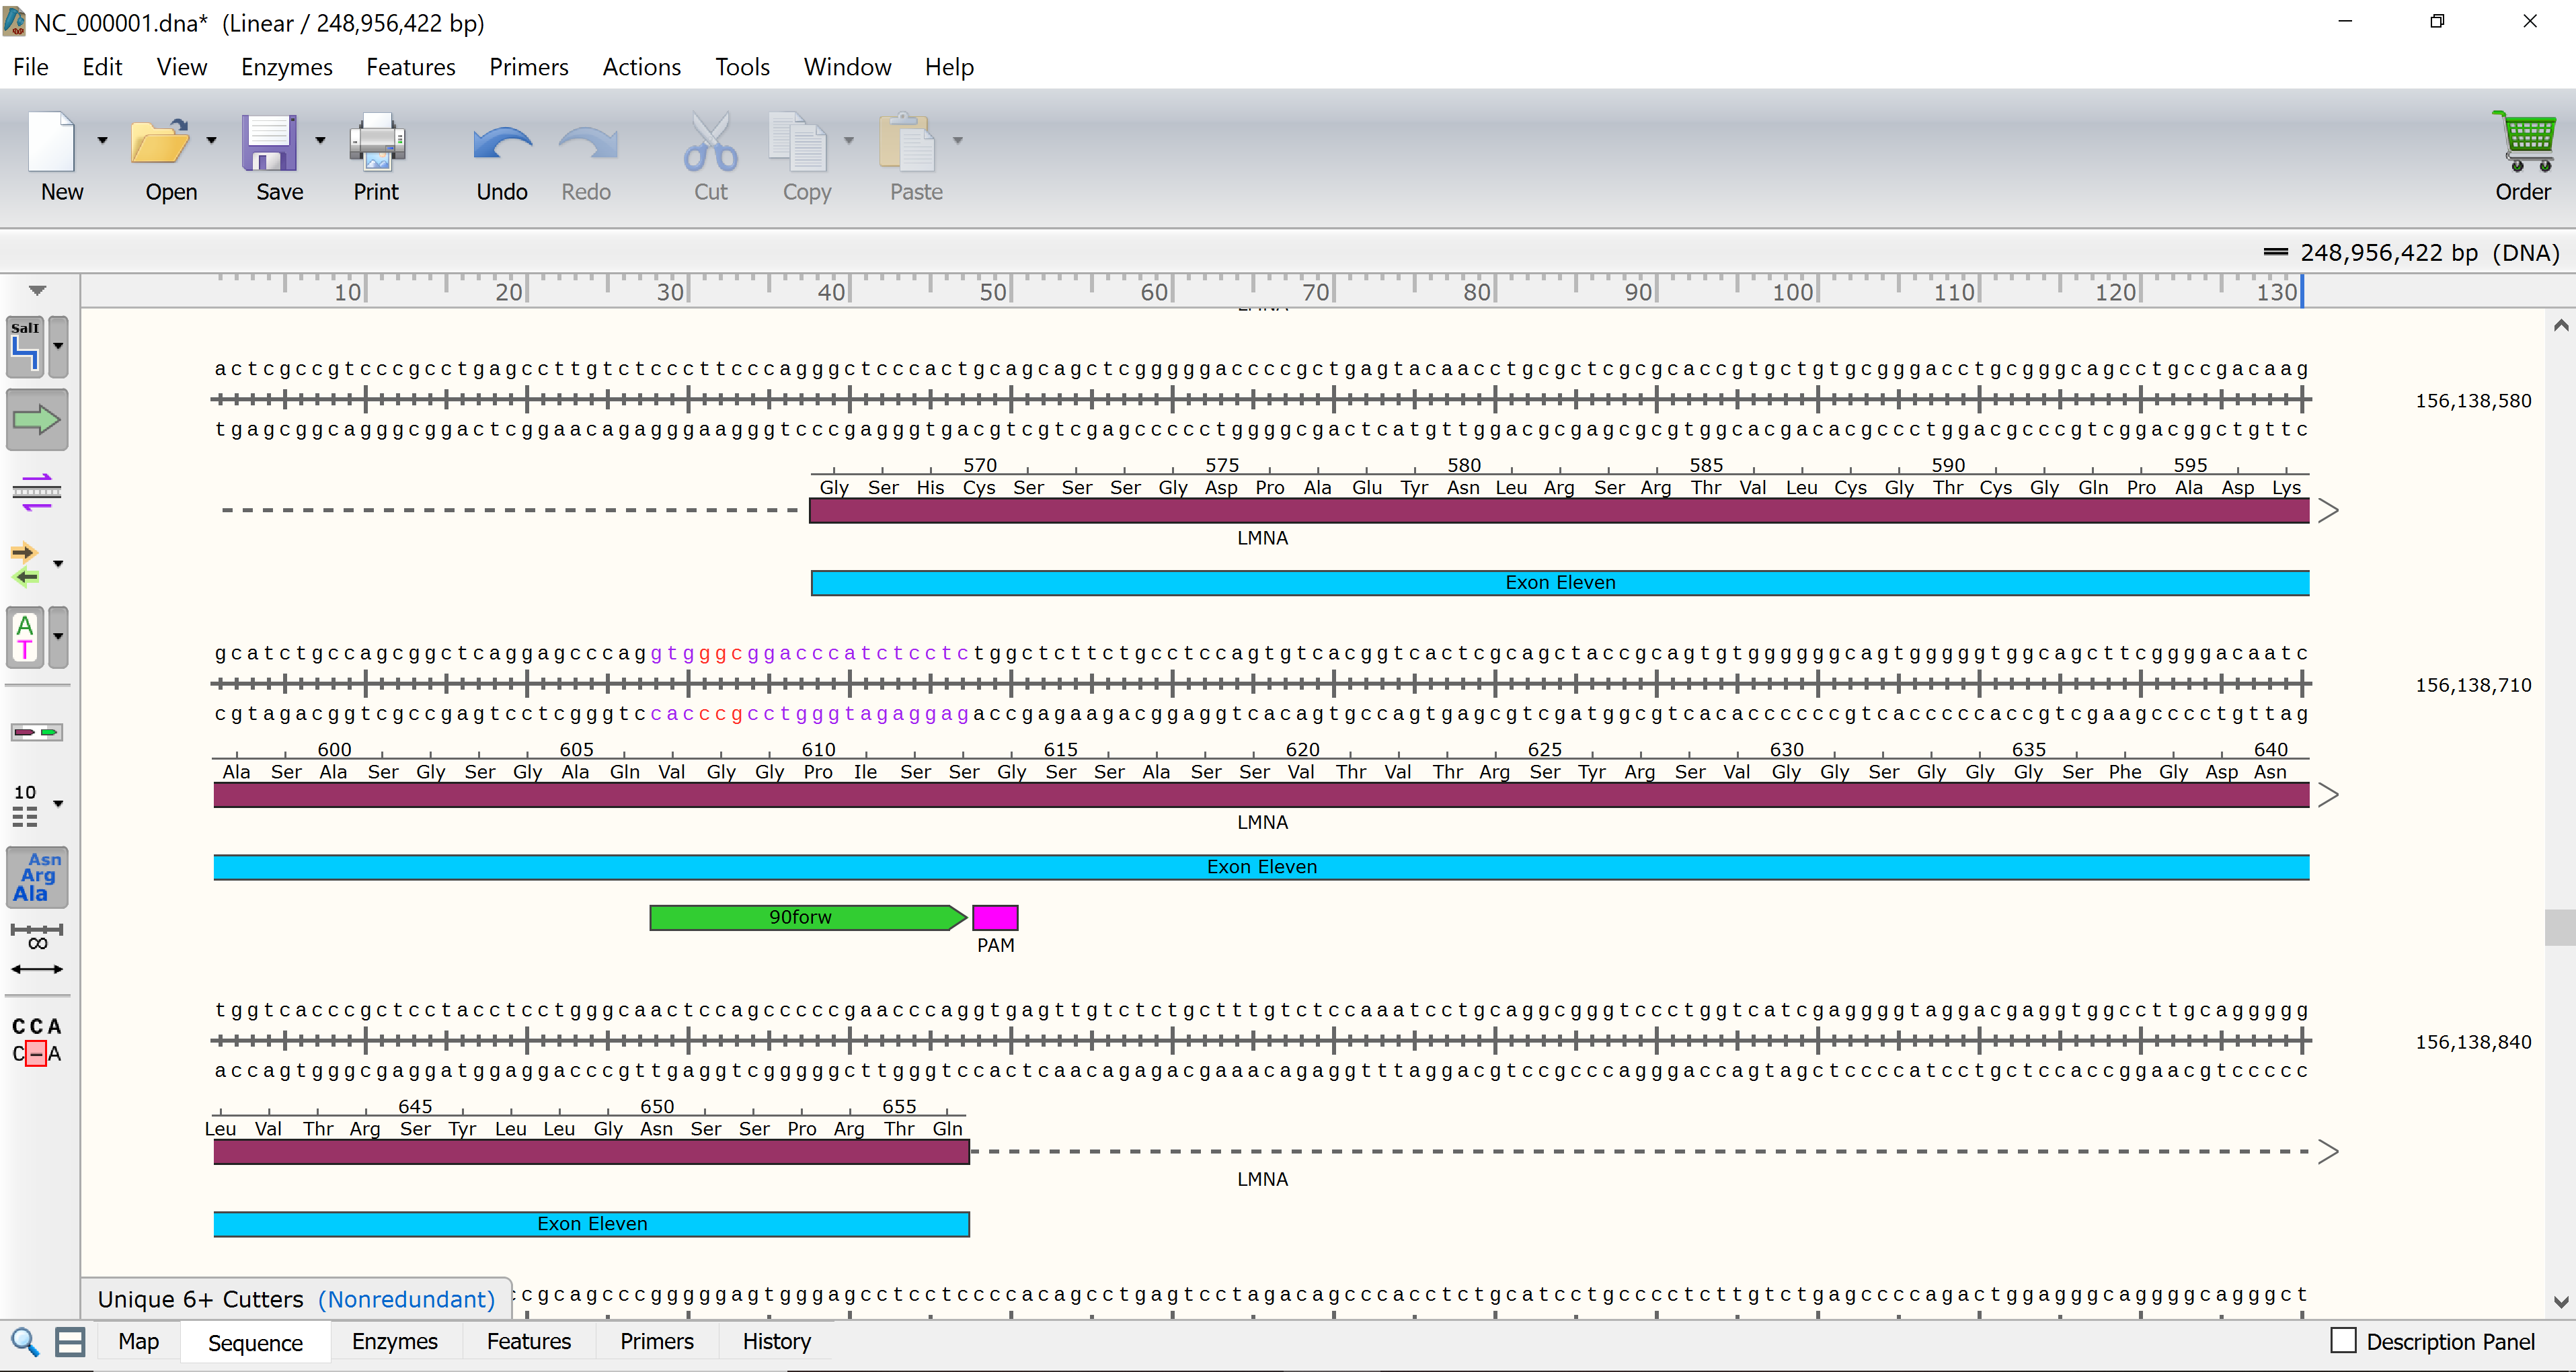

## Picking the "best" guide sequence

<div class="alert alert-success">

**Problem 10 (a).** Look back to **Problem 7 (f)**, which asked you to pick the "best" guide sequence. Let's say the disease were something critically life-threatening that *had* to be treated and this CRISPR edit is the only option. For the same given sequence, would your "best" guide sequence be any different? Explain why. If not, specify which one you would have picked.

</div>

If CRISPR were being used to cure a life-threatening disease, then I would still recommend using the "best" guide sequence I identified in Problem 7 (f), i.e. GTGGGCGGACCCATCTCCTC TGG (90/fw). By reading some of the suggested methods for choosing between guide sequences, it does not seem as though the efficiency score for a guide sequence is always accurate or useful, especially when deciding between only a few guide sequences. In this case, the choice of 90/fw makes sense: it has the highest specificity score, second highest efficiency score, and fewest number of off-target effects. These scores indicate that it is likely to identify and cut the specified target sequence instead of identifying a non-target sequence.  

References: http://crispor.tefor.net/manual/#onEff 

<div class="alert alert-success">

**Problem 10 (b).** What if it were a a mild condition that posed no serious threat (which is not the case for Progeria, which nearly always results in an early death), but reduced the patient's quality of life. For instance, chronic allergic reactions that lead to mild rashes on a small patch of skin. Would your "best" guide sequence be any different? Explain why. If not, specify which one you would have picked.

</div>

gRNA efficiency describes how well the target sequence in the genome will be cut by the gRNA, i.e. the likelihood that the the correct site will be cleaved. If we had the time and resources to do some experimental comparisons between gRNA sequences, then I would possibly suggest trying 65/rev (GGAGATGGGTCCGCCCACCT GGG) as the "best" guide sequence since it has the largest efficiency score and a "good" specificity score (>50). By comparing the performance of 65/rev and 90/rev, we could better choose a "best" guide sequence. 

**End of Project 3!** (Remember to submit your answers as a PDF, as described above.)